In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam, Nadam, SGD, RMSprop, Adadelta



# Optimizer Comparison

Using TensorFlow and the MNIST dataset to create a quick comparison graph of the various optimizers

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Input

def get_model():
    input_layer = Input(shape=(28,28, 1))
    layer1 = Conv2D(kernel_size=3, filters=32, strides=2, activation='relu')(input_layer)
    layer2 = Conv2D(kernel_size=3, filters=16, strides=2, activation='relu')(layer1)
    layer3 = Conv2D(kernel_size=3, filters=8, strides=2, activation='relu')(layer2)
    flat = Flatten()(layer3)
    output_layer = Dense(10, activation='softmax')(flat)
    
    model = Model(input_layer, output_layer)
    return model


In [16]:
results = {}

### SGD

In [17]:
# SGD
model = get_model()
model.compile(optimizer=SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_val, y_val), epochs=64)
results['sgd'] = history.history

Epoch 1/64
188/188 [==============================] - 1s 6ms/step - loss: 2.3889 - accuracy: 0.1921 - val_loss: 2.1135 - val_accuracy: 0.2238
Epoch 2/64
188/188 [==============================] - 1s 4ms/step - loss: 2.0678 - accuracy: 0.2396 - val_loss: 2.0232 - val_accuracy: 0.2633
Epoch 3/64
188/188 [==============================] - 1s 4ms/step - loss: 1.9742 - accuracy: 0.2890 - val_loss: 1.9229 - val_accuracy: 0.3174
Epoch 4/64
188/188 [==============================] - 1s 4ms/step - loss: 1.8566 - accuracy: 0.3379 - val_loss: 1.7588 - val_accuracy: 0.3723
Epoch 5/64
188/188 [==============================] - 1s 4ms/step - loss: 1.6701 - accuracy: 0.4422 - val_loss: 1.5625 - val_accuracy: 0.5071
Epoch 6/64
188/188 [==============================] - 1s 5ms/step - loss: 1.4141 - accuracy: 0.5566 - val_loss: 1.2976 - val_accuracy: 0.5861
Epoch 7/64
188/188 [==============================] - 1s 5ms/step - loss: 1.2380 - accuracy: 0.6065 - val_loss: 1.1716 - val_accuracy: 0.6227
Epoch 

### SGD + Momentum

In [18]:
# SGD Momentum
model = get_model()
model.compile(optimizer=SGD(learning_rate=1e-3, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_val, y_val), epochs=64)
results['sgd_momentum'] = history.history

Epoch 1/64
188/188 [==============================] - 1s 6ms/step - loss: 1.6941 - accuracy: 0.4521 - val_loss: 0.9714 - val_accuracy: 0.6827
Epoch 2/64
188/188 [==============================] - 1s 5ms/step - loss: 0.7612 - accuracy: 0.7606 - val_loss: 0.6228 - val_accuracy: 0.8105
Epoch 3/64
188/188 [==============================] - 1s 5ms/step - loss: 0.5413 - accuracy: 0.8381 - val_loss: 0.4812 - val_accuracy: 0.8567
Epoch 4/64
188/188 [==============================] - 1s 5ms/step - loss: 0.4218 - accuracy: 0.8726 - val_loss: 0.3914 - val_accuracy: 0.8830
Epoch 5/64
188/188 [==============================] - 1s 5ms/step - loss: 0.3517 - accuracy: 0.8948 - val_loss: 0.3397 - val_accuracy: 0.9026
Epoch 6/64
188/188 [==============================] - 1s 5ms/step - loss: 0.3025 - accuracy: 0.9092 - val_loss: 0.2993 - val_accuracy: 0.9123
Epoch 7/64
188/188 [==============================] - 1s 5ms/step - loss: 0.2681 - accuracy: 0.9191 - val_loss: 0.2681 - val_accuracy: 0.9213
Epoch 

### Nesterov Accelerated Gradient (NAG)

SGD + Nesterov

In [19]:
# SGD Nesterov Momentum
model = get_model()
model.compile(optimizer=SGD(learning_rate=1e-3, momentum=0.9, nesterov=True), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_val, y_val), epochs=64)
results['sgd_nesterov'] = history.history

Epoch 1/64
188/188 [==============================] - 1s 5ms/step - loss: 2.0062 - accuracy: 0.2908 - val_loss: 1.3857 - val_accuracy: 0.5141
Epoch 2/64
188/188 [==============================] - 1s 4ms/step - loss: 0.9074 - accuracy: 0.6978 - val_loss: 0.6101 - val_accuracy: 0.8132
Epoch 3/64
188/188 [==============================] - 1s 4ms/step - loss: 0.4851 - accuracy: 0.8555 - val_loss: 0.3927 - val_accuracy: 0.8859
Epoch 4/64
188/188 [==============================] - 1s 5ms/step - loss: 0.3577 - accuracy: 0.8936 - val_loss: 0.3277 - val_accuracy: 0.9015
Epoch 5/64
188/188 [==============================] - 1s 5ms/step - loss: 0.3006 - accuracy: 0.9104 - val_loss: 0.2845 - val_accuracy: 0.9167
Epoch 6/64
188/188 [==============================] - 1s 5ms/step - loss: 0.2649 - accuracy: 0.9199 - val_loss: 0.2642 - val_accuracy: 0.9232
Epoch 7/64
188/188 [==============================] - 1s 5ms/step - loss: 0.2400 - accuracy: 0.9271 - val_loss: 0.2454 - val_accuracy: 0.9284
Epoch 

### RMSProp

In [21]:
# RMSProp
model = get_model()
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_val, y_val), epochs=64)
results['rmsprop'] = history.history

Epoch 1/64
188/188 [==============================] - 2s 8ms/step - loss: 1.6749 - accuracy: 0.5829 - val_loss: 0.6169 - val_accuracy: 0.8155
Epoch 2/64
188/188 [==============================] - 1s 6ms/step - loss: 0.4169 - accuracy: 0.8764 - val_loss: 0.3155 - val_accuracy: 0.9065
Epoch 3/64
188/188 [==============================] - 1s 6ms/step - loss: 0.2524 - accuracy: 0.9243 - val_loss: 0.2163 - val_accuracy: 0.9352
Epoch 4/64
188/188 [==============================] - 1s 6ms/step - loss: 0.1864 - accuracy: 0.9445 - val_loss: 0.1857 - val_accuracy: 0.9435
Epoch 5/64
188/188 [==============================] - 1s 5ms/step - loss: 0.1499 - accuracy: 0.9548 - val_loss: 0.1663 - val_accuracy: 0.9504
Epoch 6/64
188/188 [==============================] - 1s 5ms/step - loss: 0.1262 - accuracy: 0.9624 - val_loss: 0.1436 - val_accuracy: 0.9570
Epoch 7/64
188/188 [==============================] - 1s 6ms/step - loss: 0.1094 - accuracy: 0.9664 - val_loss: 0.1203 - val_accuracy: 0.9634
Epoch 

### Adam Optimizer

In [22]:
# Adam
model = get_model()
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_val, y_val), epochs=64)
results['adam'] = history.history

Epoch 1/64
188/188 [==============================] - 2s 6ms/step - loss: 2.1282 - accuracy: 0.3632 - val_loss: 1.2832 - val_accuracy: 0.6097
Epoch 2/64
188/188 [==============================] - 1s 5ms/step - loss: 0.8339 - accuracy: 0.7505 - val_loss: 0.5437 - val_accuracy: 0.8378
Epoch 3/64
188/188 [==============================] - 1s 6ms/step - loss: 0.4245 - accuracy: 0.8744 - val_loss: 0.3519 - val_accuracy: 0.8943
Epoch 4/64
188/188 [==============================] - 1s 5ms/step - loss: 0.3038 - accuracy: 0.9090 - val_loss: 0.2729 - val_accuracy: 0.9202
Epoch 5/64
188/188 [==============================] - 1s 5ms/step - loss: 0.2455 - accuracy: 0.9268 - val_loss: 0.2376 - val_accuracy: 0.9300
Epoch 6/64
188/188 [==============================] - 1s 5ms/step - loss: 0.2034 - accuracy: 0.9393 - val_loss: 0.2015 - val_accuracy: 0.9386
Epoch 7/64
188/188 [==============================] - 1s 5ms/step - loss: 0.1744 - accuracy: 0.9474 - val_loss: 0.1805 - val_accuracy: 0.9455
Epoch 

### Adam Optimizer + Nesterov Momentum (NAdam Optimizer)

In [23]:
# NAdam
model = get_model()
model.compile(optimizer=Nadam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=256, validation_data=(x_val, y_val), epochs=64)
results['nadam'] = history.history

Epoch 1/64
188/188 [==============================] - 2s 8ms/step - loss: 2.5252 - accuracy: 0.3255 - val_loss: 1.4865 - val_accuracy: 0.4997
Epoch 2/64
188/188 [==============================] - 1s 7ms/step - loss: 1.0152 - accuracy: 0.6782 - val_loss: 0.6868 - val_accuracy: 0.7982
Epoch 3/64
188/188 [==============================] - 1s 7ms/step - loss: 0.5245 - accuracy: 0.8460 - val_loss: 0.4258 - val_accuracy: 0.8762
Epoch 4/64
188/188 [==============================] - 1s 7ms/step - loss: 0.3612 - accuracy: 0.8921 - val_loss: 0.3347 - val_accuracy: 0.9008
Epoch 5/64
188/188 [==============================] - 1s 7ms/step - loss: 0.2780 - accuracy: 0.9170 - val_loss: 0.2724 - val_accuracy: 0.9176
Epoch 6/64
188/188 [==============================] - 1s 7ms/step - loss: 0.2328 - accuracy: 0.9300 - val_loss: 0.2333 - val_accuracy: 0.9326
Epoch 7/64
188/188 [==============================] - 1s 7ms/step - loss: 0.2019 - accuracy: 0.9399 - val_loss: 0.2197 - val_accuracy: 0.9367
Epoch 

Plotting the training losses for all the optimizers

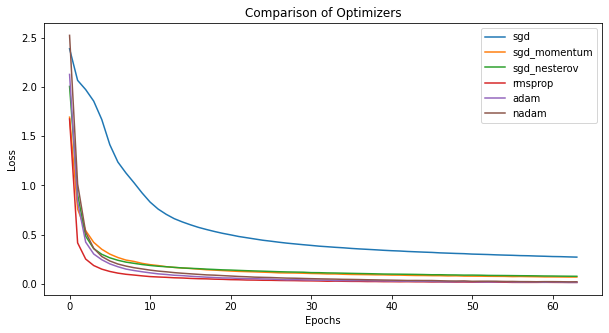

In [29]:
plt.figure(figsize=(10,5))
for k in results.keys():
    plt.plot(results[k]['loss'], label=k)
plt.title("Comparison of Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Plotting the validation losses for all the optimizers

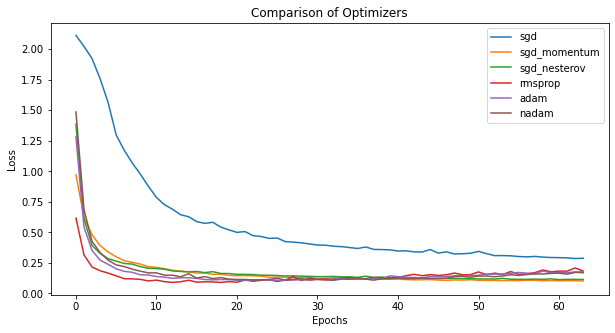

In [30]:
plt.figure(figsize=(10,5))
for k in results.keys():
    plt.plot(results[k]['val_loss'], label=k)
plt.title("Comparison of Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()